<a href="https://colab.research.google.com/github/Sarthak702-droid/Titanic-Death-Predection/blob/main/Titanic_Death_Analalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv("The Titanic dataset.csv")
df.head()

,sn,pclass,survived,Unnamed: 3,gender,age,family,fare,embarked,date
0,1,3,0,Mr. Anthony,male,42,0.0,7.55,NaN,01-Jan-90
1,1,3,0,Mr. Anthony,male,42,0.0,7.55,NaN,01-Jan-90
2,2,3,0,Master. Eugene Joseph,male,?,2.0,20.25,S,02-Jan-90
3,3,2,0,"Abbott, Mr. Rossmore Edward",NaN,NaN,2.0,**,S,03-Jan-90
4,4,3,1,"Abbott, Mr. Rossmore Edward",female,35,2.0,20.25,S,04-Jan-90


In [3]:
df.shape

(1301, 10)

In [4]:
df.isna().sum()

,0
sn,0
pclass,0
survived,0
Unnamed: 3,0
gender,1
age,257
family,2
fare,2
embarked,6
date,0


In [5]:
print(f'Number of unique values :- {df['age'].nunique()}\nUnique Values:- {df['age'].unique()}')

Number of unique values :- 97
Unique Values:- ['42' '?' nan '35' '16' '25' '30' '28' '20' '18' '26' '40' '0.83' '24'
 '29' '0.92' '2' '32' '19' '48' '4' '6' '17' '38' '9' '11' '39' '27' '63'
 '34' '36' '53' '71' '57' '5' '3' '13' '23' '45' '21' '47' '33' '0.75'
 '80' '22' '51' '50' '1' '12' '37' '58' '41' '15' '60' '44' '59' '18.5'
 '14' '54' '49' '76' '46' '52' '8' '31' '64' '70.5' '43' '55' '70' '22.5'
 '36.5' '65' '40.5' '10' '0.67' '23.5' '62' '7' '32.5' '34.5' '61' '20.5'
 '30.5' '55.5' '0.17' '28.5' '45.5' '56' '38.5' '14.5' '24.5' '60.5' '67'
 '74' '11.5' '66' '26.5']


In [6]:
df.duplicated().sum()

np.int64(1)

In [7]:
df.drop_duplicates(inplace = True)

In [8]:
df.drop('Unnamed: 3' ,axis = 1, inplace = True)

In [9]:
df.shape

(1300, 9)

In [10]:
df.dropna(subset=["gender", "family", "fare", "embarked"], inplace = True)

In [11]:
df['age'] = pd.to_numeric(df['age'], errors='coerce')
df['age'] = df['age'].fillna(df['age'].mean())

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1292 entries, 2 to 1300
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sn        1292 non-null   int64  
 1   pclass    1292 non-null   int64  
 2   survived  1292 non-null   int64  
 3   gender    1292 non-null   object 
 4   age       1292 non-null   float64
 5   family    1292 non-null   float64
 6   fare      1292 non-null   object 
 7   embarked  1292 non-null   object 
 8   date      1292 non-null   object 
dtypes: float64(2), int64(3), object(4)
memory usage: 100.9+ KB


In [13]:
df['date'] = pd.to_datetime(df['date'], format='%d-%b-%y')

In [14]:
df['fare'] = pd.to_numeric(df['fare'], errors='coerce')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1292 entries, 2 to 1300
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   sn        1292 non-null   int64         
 1   pclass    1292 non-null   int64         
 2   survived  1292 non-null   int64         
 3   gender    1292 non-null   object        
 4   age       1292 non-null   float64       
 5   family    1292 non-null   float64       
 6   fare      1292 non-null   float64       
 7   embarked  1292 non-null   object        
 8   date      1292 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(3), object(2)
memory usage: 100.9+ KB


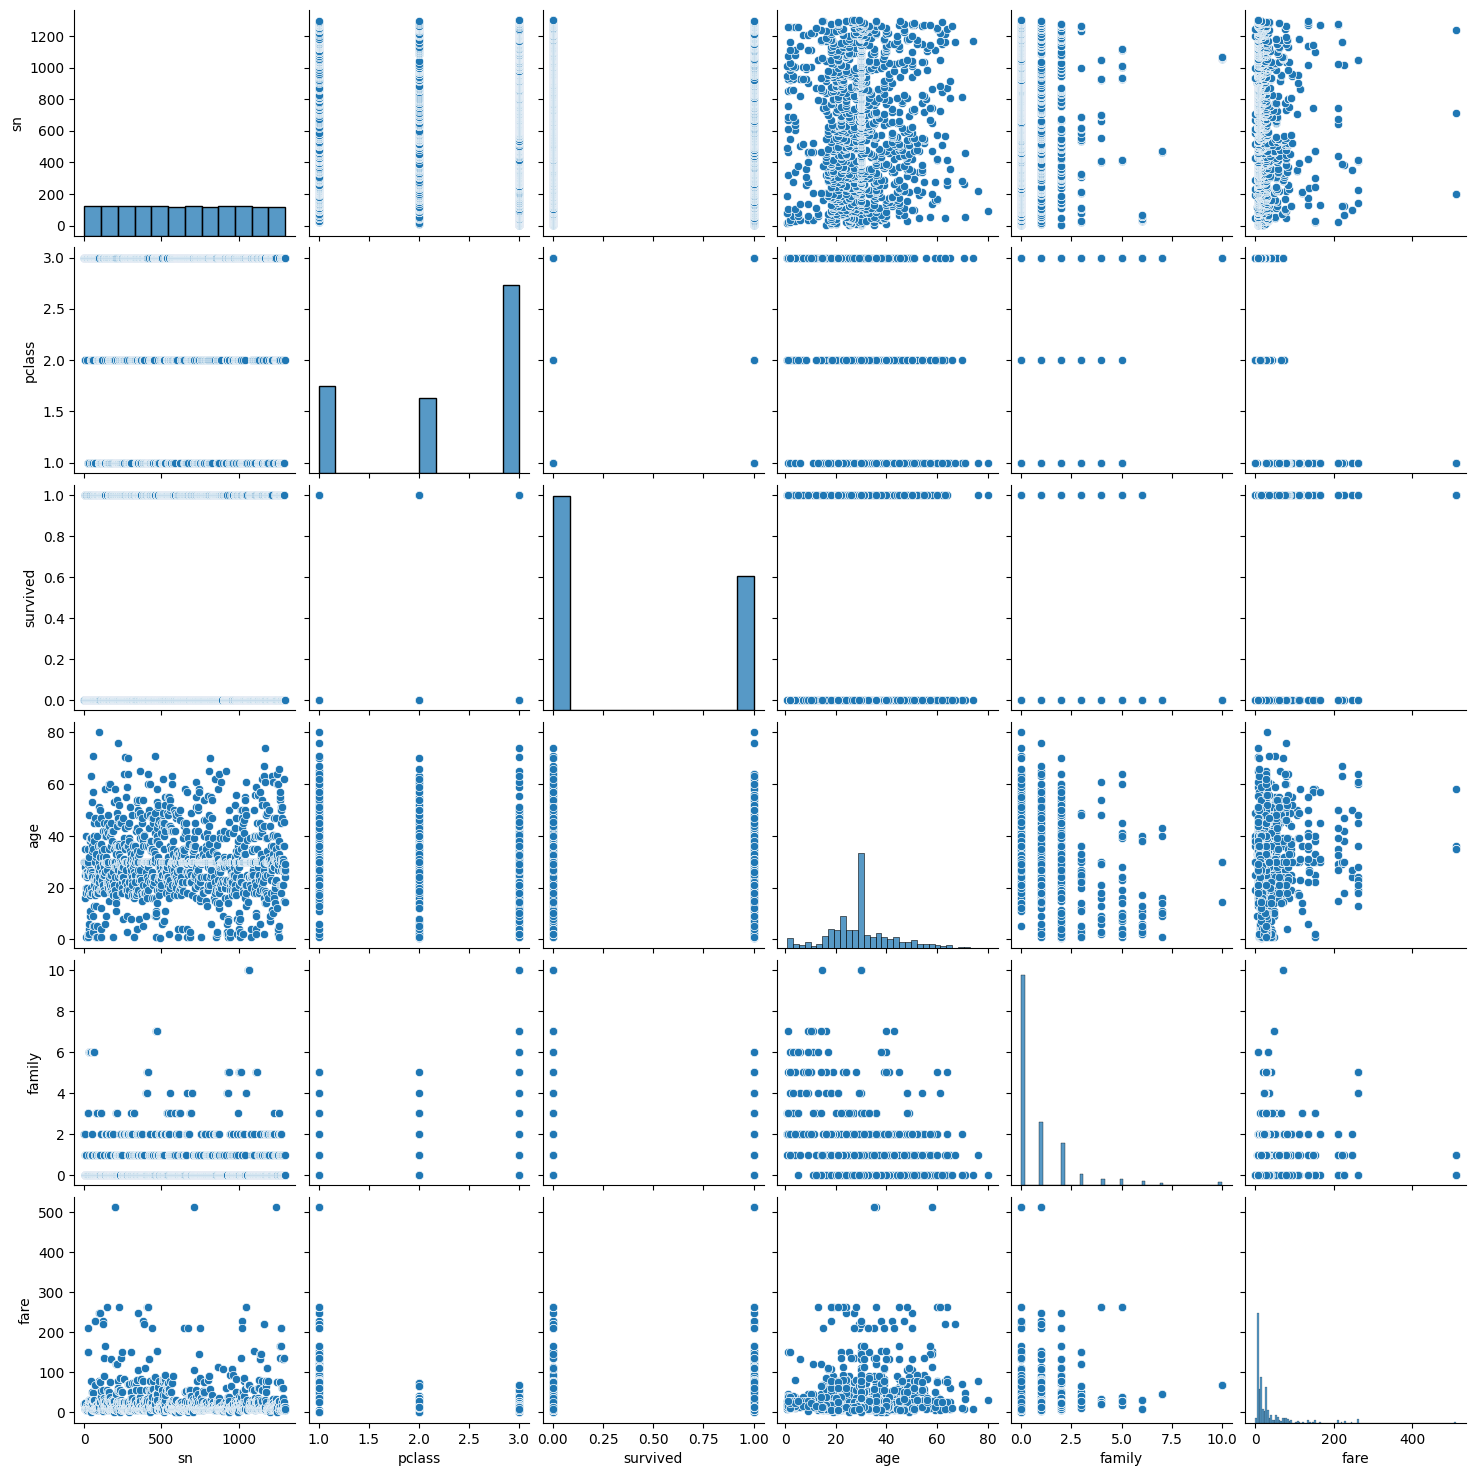

In [16]:
sns.pairplot(data = df)

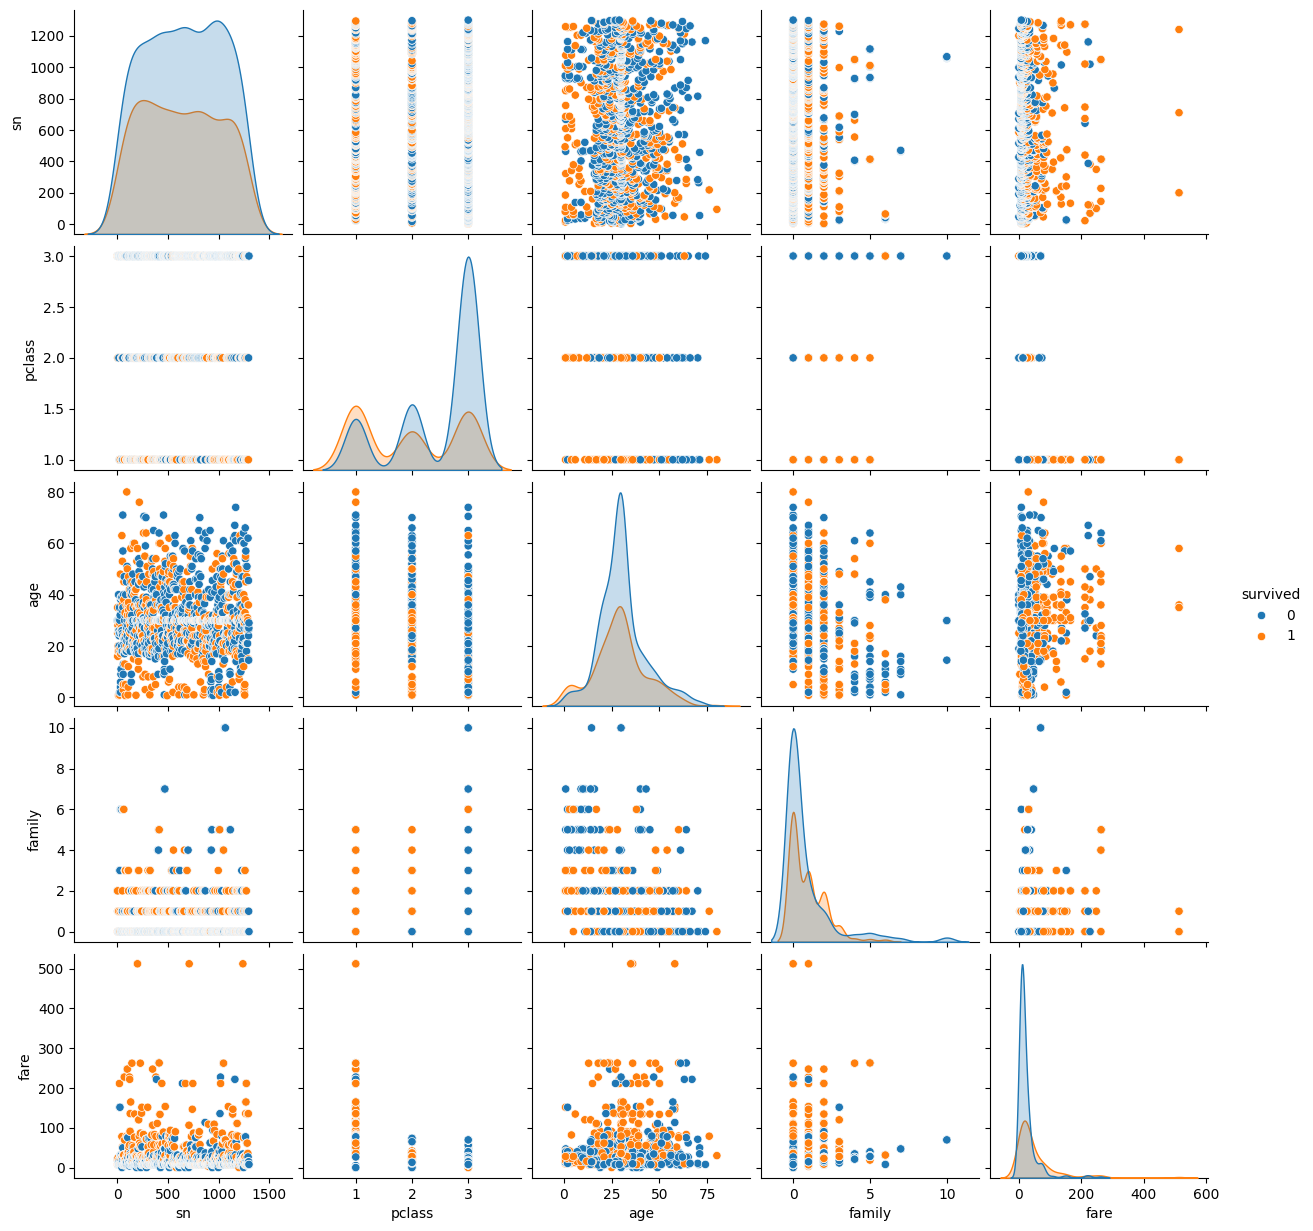

In [17]:
sns.pairplot(data = df , hue = 'survived')

/tmp/ipython-input-2902230982.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df , y = 'survived',palette = 'OrRd')


[]

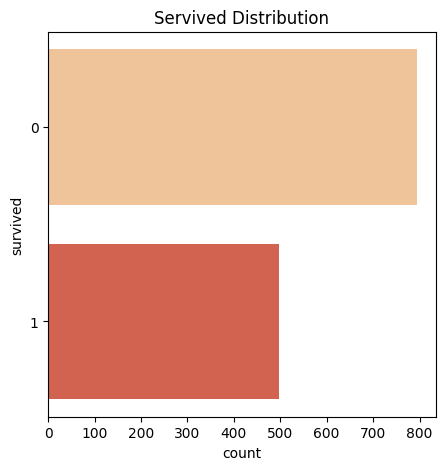

In [18]:
plt.figure(figsize = (5,5))
sns.countplot(data = df , y = 'survived',palette = 'OrRd')
plt.title("Servived Distribution")
plt.plot()

In [19]:
df['survived'].value_counts()

,count
survived,
0,795
1,497


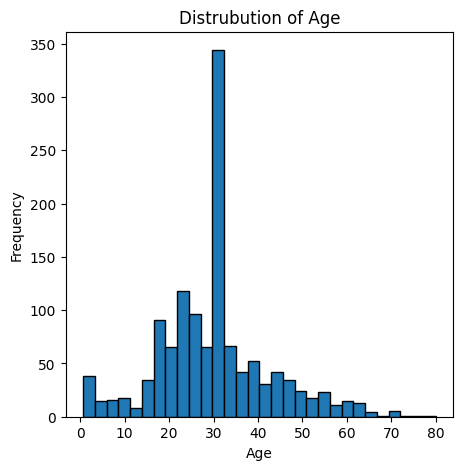

In [20]:
plt.figure(figsize=(5,5))
plt.hist(df["age"], bins=30 , edgecolor = 'black')
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Distrubution of Age")
plt.show()

In [21]:
df['age'].value_counts()

,count
age,
29.916345,255
24.000000,47
22.000000,43
21.000000,41
30.000000,40
...,...
67.000000,1
74.000000,1
11.500000,1


In [22]:
df['age'].max()

80.0

In [23]:
df['age'].min()

0.67

In [24]:
df['age'].unique()

array([29.91634523, 35.        , 16.        , 25.        , 30.        ,
       28.        , 20.        , 18.        , 26.        , 40.        ,
        0.83      , 24.        , 29.        ,  0.92      ,  2.        ,
       32.        , 19.        , 48.        ,  4.        ,  6.        ,
       17.        , 38.        ,  9.        , 11.        , 39.        ,
       27.        , 63.        , 34.        , 36.        , 53.        ,
       71.        , 57.        ,  5.        ,  3.        , 13.        ,
       23.        , 45.        , 21.        , 47.        , 33.        ,
        0.75      , 80.        , 22.        , 51.        , 50.        ,
        1.        , 12.        , 37.        , 42.        , 58.        ,
       41.        , 15.        , 60.        , 44.        , 59.        ,
       18.5       , 14.        , 54.        , 49.        , 76.        ,
       46.        , 52.        ,  8.        , 31.        , 64.        ,
       70.5       , 43.        , 55.        , 70.        , 22.5 

In [25]:
df['age'] = pd.to_numeric(df['age'], errors='coerce')

In [26]:
df['age'].unique()

array([29.91634523, 35.        , 16.        , 25.        , 30.        ,
       28.        , 20.        , 18.        , 26.        , 40.        ,
        0.83      , 24.        , 29.        ,  0.92      ,  2.        ,
       32.        , 19.        , 48.        ,  4.        ,  6.        ,
       17.        , 38.        ,  9.        , 11.        , 39.        ,
       27.        , 63.        , 34.        , 36.        , 53.        ,
       71.        , 57.        ,  5.        ,  3.        , 13.        ,
       23.        , 45.        , 21.        , 47.        , 33.        ,
        0.75      , 80.        , 22.        , 51.        , 50.        ,
        1.        , 12.        , 37.        , 42.        , 58.        ,
       41.        , 15.        , 60.        , 44.        , 59.        ,
       18.5       , 14.        , 54.        , 49.        , 76.        ,
       46.        , 52.        ,  8.        , 31.        , 64.        ,
       70.5       , 43.        , 55.        , 70.        , 22.5 

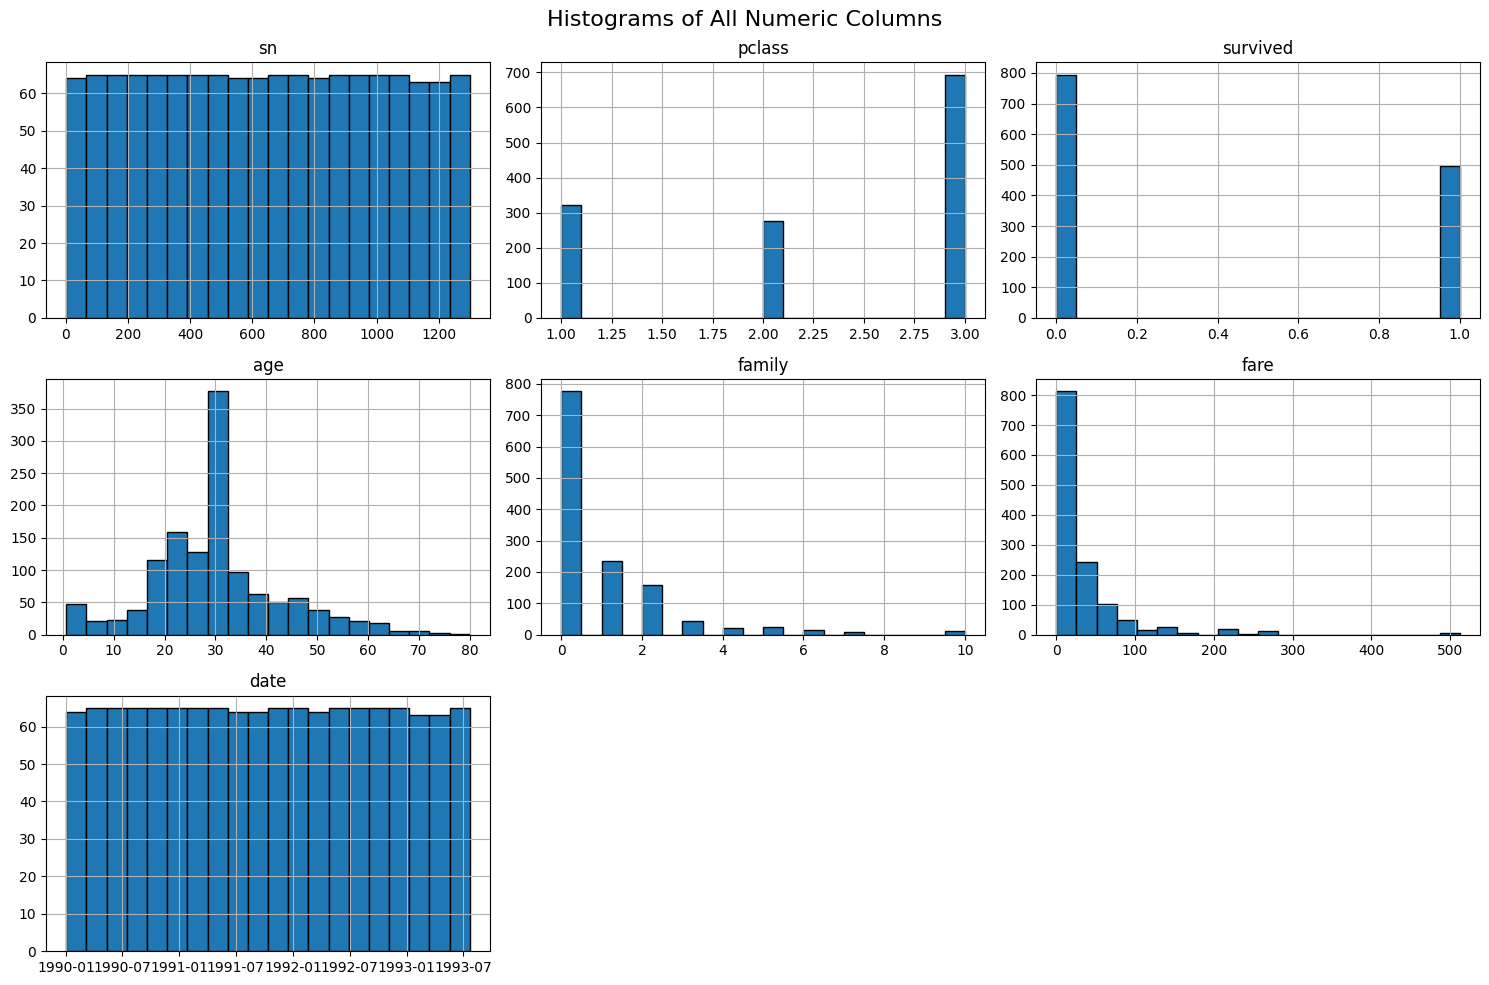

In [27]:
df.hist(figsize=(15, 10), bins=20, edgecolor='black')
plt.suptitle("Histograms of All Numeric Columns", fontsize=16)
plt.tight_layout()
plt.show()

/tmp/ipython-input-505949439.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df , y = 'embarked',palette = 'OrRd')


[]

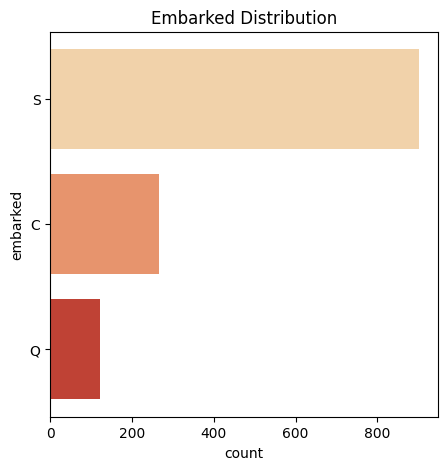

In [28]:
plt.figure(figsize = (5,5))
sns.countplot(data = df , y = 'embarked',palette = 'OrRd')
plt.title("Embarked Distribution")
plt.plot()

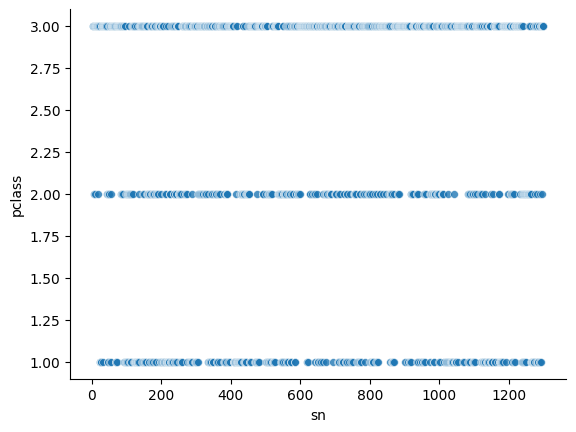

In [29]:
sns.scatterplot(data=df, x='sn', y='pclass', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

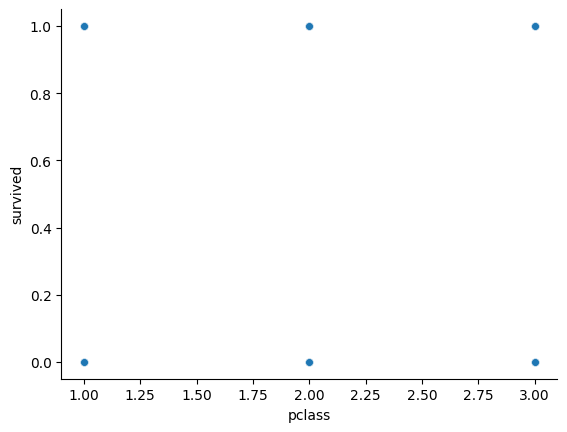

In [30]:
sns.scatterplot(data=df, x='pclass', y='survived', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

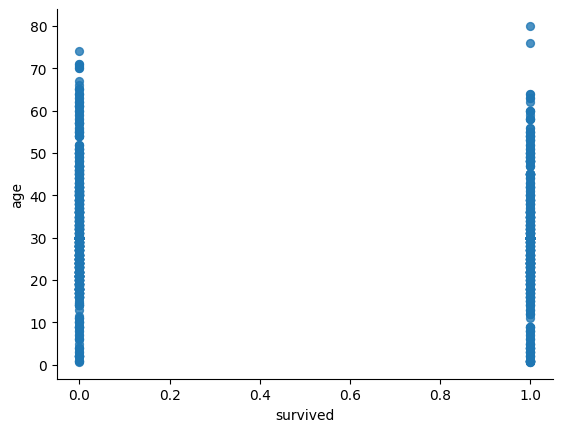

In [31]:
df.plot(kind='scatter', x='survived', y='age', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [32]:
df_numeric = df.select_dtypes(include=np.number)

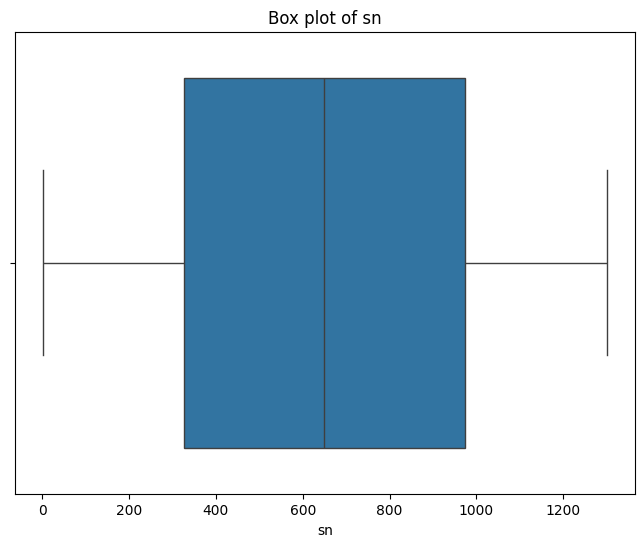

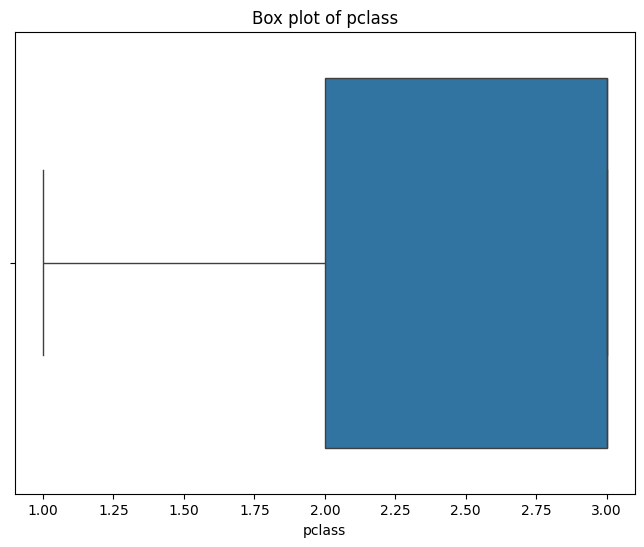

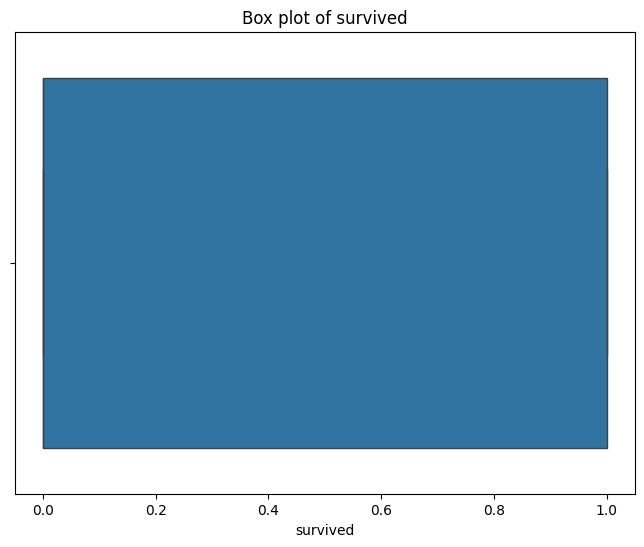

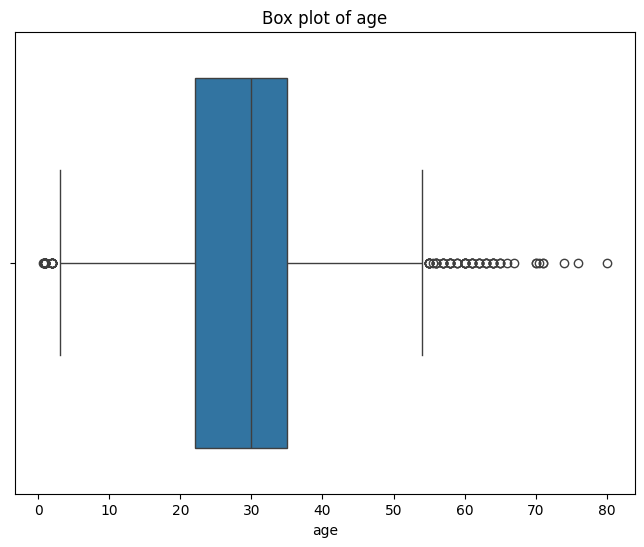

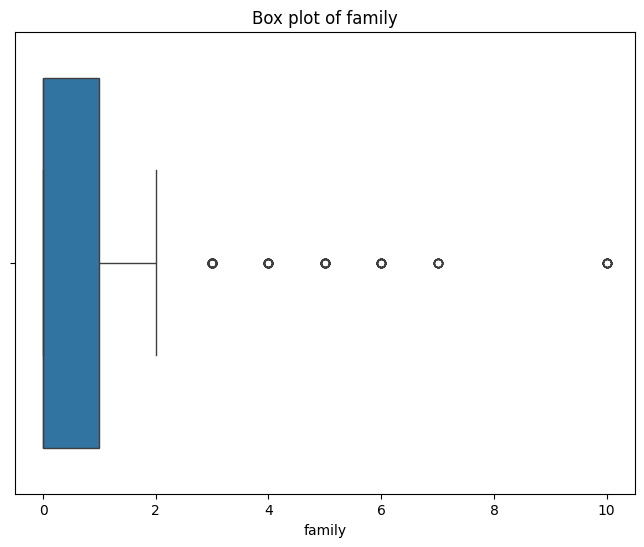

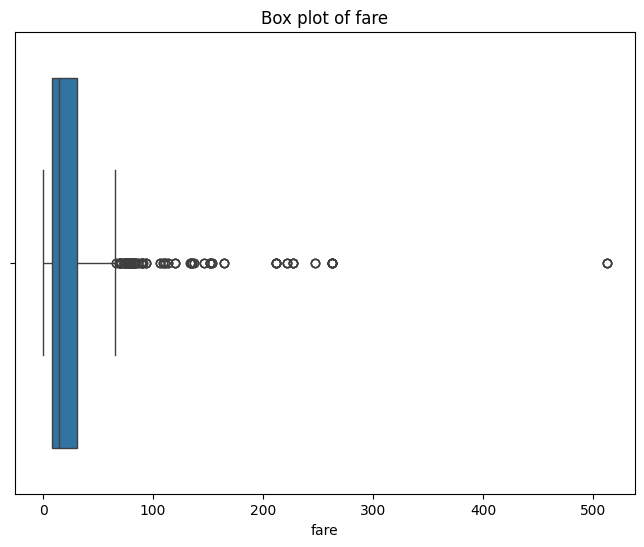

In [33]:
for column in df_numeric.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[column])
    plt.title(f"Box plot of {column}")
    plt.show()

In [34]:
outlier_bounds = {}
for column in df_numeric.columns:
    Q1 = df_numeric[column].quantile(0.25)
    Q3 = df_numeric[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outlier_bounds[column] = {'Q1': Q1, 'Q3': Q3, 'IQR': IQR, 'lower_bound': lower_bound, 'upper_bound': upper_bound}

for column, bounds in outlier_bounds.items():
    print(f"Column: {column}")
    print(f"  Q1: {bounds['Q1']}")
    print(f"  Q3: {bounds['Q3']}")
    print(f"  IQR: {bounds['IQR']}")
    print(f"  Lower Bound: {bounds['lower_bound']}")
    print(f"  Upper Bound: {bounds['upper_bound']}")
    print("-" * 20)

Column: sn
  Q1: 325.75
  Q3: 973.25
  IQR: 647.5
  Lower Bound: -645.5
  Upper Bound: 1944.5
--------------------
Column: pclass
  Q1: 2.0
  Q3: 3.0
  IQR: 1.0
  Lower Bound: 0.5
  Upper Bound: 4.5
--------------------
Column: survived
  Q1: 0.0
  Q3: 1.0
  IQR: 1.0
  Lower Bound: -1.5
  Upper Bound: 2.5
--------------------
Column: age
  Q1: 22.0
  Q3: 35.0
  IQR: 13.0
  Lower Bound: 2.5
  Upper Bound: 54.5
--------------------
Column: family
  Q1: 0.0
  Q3: 1.0
  IQR: 1.0
  Lower Bound: -1.5
  Upper Bound: 2.5
--------------------
Column: fare
  Q1: 7.8958
  Q3: 31.275
  IQR: 23.379199999999997
  Lower Bound: -27.172999999999995
  Upper Bound: 66.34379999999999
--------------------


In [35]:
rows_to_drop = []
for column, bounds in outlier_bounds.items():
    lower_bound = bounds['lower_bound']
    upper_bound = bounds['upper_bound']
    outlier_indices = df[(df[column] < lower_bound) | (df[column] > upper_bound)].index
    rows_to_drop.extend(outlier_indices)

rows_to_drop = set(rows_to_drop)
df_cleaned = df.drop(index=rows_to_drop)

print(f"Original DataFrame shape: {df.shape}")
print(f"Cleaned DataFrame shape: {df_cleaned.shape}")

Original DataFrame shape: (1292, 9)
Cleaned DataFrame shape: (970, 9)


In [36]:
df['age'].unique()

array([29.91634523, 35.        , 16.        , 25.        , 30.        ,
       28.        , 20.        , 18.        , 26.        , 40.        ,
        0.83      , 24.        , 29.        ,  0.92      ,  2.        ,
       32.        , 19.        , 48.        ,  4.        ,  6.        ,
       17.        , 38.        ,  9.        , 11.        , 39.        ,
       27.        , 63.        , 34.        , 36.        , 53.        ,
       71.        , 57.        ,  5.        ,  3.        , 13.        ,
       23.        , 45.        , 21.        , 47.        , 33.        ,
        0.75      , 80.        , 22.        , 51.        , 50.        ,
        1.        , 12.        , 37.        , 42.        , 58.        ,
       41.        , 15.        , 60.        , 44.        , 59.        ,
       18.5       , 14.        , 54.        , 49.        , 76.        ,
       46.        , 52.        ,  8.        , 31.        , 64.        ,
       70.5       , 43.        , 55.        , 70.        , 22.5 

In [37]:
# Performing Label Encoding
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])

In [38]:
df.head()

,sn,pclass,survived,gender,age,family,fare,embarked,date
2,2,3,0,1,29.916345,2.0,20.25,S,1990-01-02
4,4,3,1,0,35.000000,2.0,20.25,S,1990-01-04
5,5,3,1,0,16.000000,0.0,7.65,S,1990-01-05
6,6,3,1,1,25.000000,0.0,7.65,S,1990-01-06
7,7,2,0,1,30.000000,1.0,24.00,C,1990-01-07


In [39]:
# Performing OneHot Encoding
df = pd.get_dummies(df, columns=['embarked'], drop_first=True)

In [40]:
df.head()

,sn,pclass,survived,gender,age,family,fare,date,embarked_Q,embarked_S
2,2,3,0,1,29.916345,2.0,20.25,1990-01-02,False,True
4,4,3,1,0,35.000000,2.0,20.25,1990-01-04,False,True
5,5,3,1,0,16.000000,0.0,7.65,1990-01-05,False,True
6,6,3,1,1,25.000000,0.0,7.65,1990-01-06,False,True
7,7,2,0,1,30.000000,1.0,24.00,1990-01-07,False,False


In [41]:
x_train , x_test , y_train , y_test = train_test_split(df.drop('survived',axis = 1) , df['survived'] , test_size = 0.2 , random_state = 42)

In [42]:
model = LogisticRegression(max_iter=1000)
model.fit(x_train.drop('date', axis=1), y_train)

LogisticRegression(max_iter=1000)

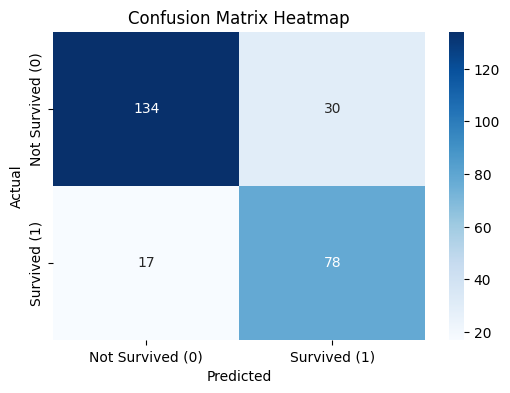

In [43]:
y_pred = model.predict(x_test.drop('date', axis=1))

cm = confusion_matrix(y_test, y_pred)

# Heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues",
            xticklabels=["Not Survived (0)", "Survived (1)"],
            yticklabels=["Not Survived (0)", "Survived (1)"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Heatmap")
plt.show()

In [44]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8185328185328186
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.82      0.85       164
           1       0.72      0.82      0.77        95

    accuracy                           0.82       259
   macro avg       0.80      0.82      0.81       259
weighted avg       0.83      0.82      0.82       259



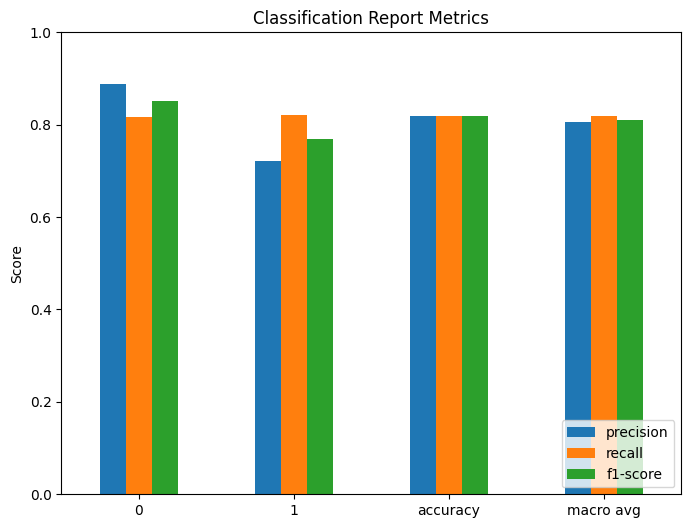

In [45]:
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

# Barplot for Precision, Recall, F1
report_df.iloc[:-1, :3].plot(kind='bar', figsize=(8,6), rot=0)
plt.title("Classification Report Metrics")
plt.ylabel("Score")
plt.ylim(0,1)
plt.legend(loc="lower right")
plt.show()

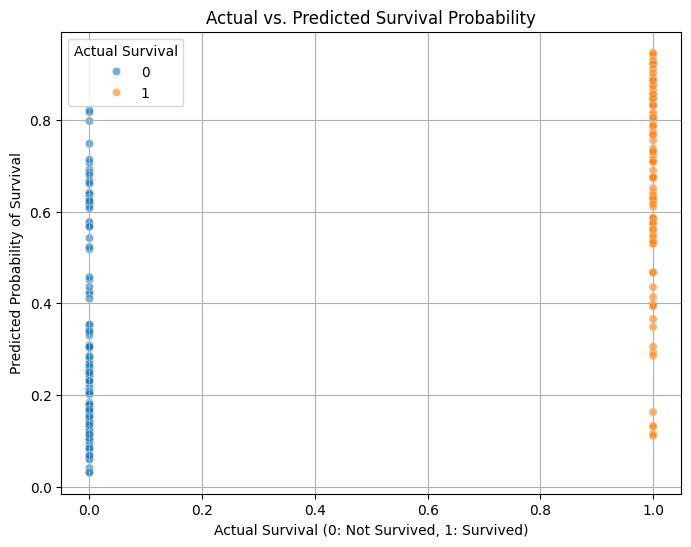

In [52]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_proba, hue=y_test, alpha=0.6)
plt.xlabel("Actual Survival (0: Not Survived, 1: Survived)")
plt.ylabel("Predicted Probability of Survival")
plt.title("Actual vs. Predicted Survival Probability")
plt.legend(title="Actual Survival")
plt.grid(True)
plt.show()

In [53]:
df_gradio_input = df.drop('survived', axis=1)

In [54]:
def predict_survival(sn, pclass, gender, age, family, fare, embarked_Q, embarked_S):
    """
    Predicts the survival probability using the trained logistic regression model.

    Args:
        sn (int): Serial number.
        pclass (int): Passenger class (1, 2, or 3).
        gender (int): Gender (0 for female, 1 for male).
        age (float): Age.
        family (float): Number of family members.
        fare (float): Fare paid.
        embarked_Q (bool): True if embarked at Q, False otherwise.
        embarked_S (bool): True if embarked at S, False otherwise.

    Returns:
        float: Predicted survival probability.
    """
    # Create a DataFrame from input parameters
    input_data = pd.DataFrame([[sn, pclass, gender, age, family, fare, embarked_Q, embarked_S]],
                              columns=['sn', 'pclass', 'gender', 'age', 'family', 'fare', 'embarked_Q', 'embarked_S'])

    # Predict the survival probability
    survival_probability = model.predict_proba(input_data)[:, 1]

    return survival_probability[0]

In [55]:
import gradio as gr

# Create Gradio interface
interface = gr.Interface(
    fn=predict_survival,
    inputs=[
        gr.Number(label="Serial Number"),
        gr.Number(label="Passenger Class (1, 2, or 3)"),
        gr.Dropdown(choices=[0, 1], label="Gender (0: Female, 1: Male)"),
        gr.Number(label="Age"),
        gr.Number(label="Family Members"),
        gr.Number(label="Fare"),
        gr.Checkbox(label="Embarked at Q"),
        gr.Checkbox(label="Embarked at S")
    ],
    outputs=gr.Number(label="Predicted Survival Probability"),
    title="Titanic Survival Prediction"
)

In [56]:
interface.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://304a5ff159c68f35d4.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
